# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

<a id="описание"></a>
## Описание проекта.

Заказчик исследования - компания-разработчик развлекательного приложения **`Procrastinate Pro+`**.  
Несмотря на значительные вложения в рекламу, последние несколько месяцев компания терпит убытки.   


В нашем распоряжении данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года в виде CSV-файлов со следующими данными:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.  

**Цели исследования** — разобраться в причинах убытков и помочь компании выйти в плюс.  


Для этого следует изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.  

**План проведения исследования.**  
- загрузить данные и выполнить их предварительную обработку,
- задать функции для расчёта и анализа LTV, ROI, удержания и конверсии,
- провести исследовательский анализ данных,
- провести расчеты маркетинговых показателей,
- оценить окупаемость рекламы.

<a id="подготовка"></a>
## Загрузка данных и подготовка их к анализу.

Загрузм данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучим данные и выполним предобработку. Рассмотрим наличие в данных пропусков и дубликатов. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям.

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
visits = pd.read_csv('/content/visits_info_short.csv')
purchases = pd.read_csv('/content/orders_info_short.csv')
ad_costs = pd.read_csv('/content/costs_info_short.csv')

In [ ]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


В датафрейме `visits` 6 колонок и 309901 строк.  
Пропусков нет.  
Требуется изменить формат названий столбцов и формат колонок с датами.

In [ ]:
# Переименуем все колонки в snake_style.
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

# Изменим формат колонок с датами
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

# Провперим невяные дубликаты в колонках с категорияальными значениями
unique_values = pd.unique(visits[['region', 'device', 'channel']].values.ravel())
unique_values = np.sort(unique_values)
unique_values

array(['AdNonSense', 'Android', 'FaceBoom', 'France', 'Germany',
       'LeapBob', 'Mac', 'MediaTornado', 'OppleCreativeMedia', 'PC',
       'RocketSuperAds', 'TipTop', 'UK', 'United States',
       'WahooNetBanner', 'YRabbit', 'iPhone', 'lambdaMediaAds', 'organic'],
      dtype=object)

In [ ]:
print('Явных строк-дубликатов:', visits.duplicated().sum())

Явных строк-дубликатов: 0


In [ ]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


С первым датафреймом все в проядке. Дубликатов не было.  
Переходим ко второму.

In [ ]:
purchases.info()
purchases.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


В датафрейме `purchases` 3 колонки и 40212 строк.  
Пропусков нет.  
Требуется изменить формат названий столбцов и формат колонки с датами.

In [ ]:
# Переименуем все колонки в snake_style.
purchases.columns = ['user_id', 'event_dt', 'revenue']

# Изменим формат колонки с датами
purchases['event_dt'] = pd.to_datetime(purchases['event_dt'])

# посмотрим, какие значения есть в колонке `revenue` и оценим, есть ли аномалии
purchases['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

In [ ]:
print('Явных строк-дубликатов:', purchases.duplicated().sum())

Явных строк-дубликатов: 0


In [ ]:
purchases.info()
purchases.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Все в порядке.  

Рассмотрим третий датафрейм.

In [ ]:
ad_costs.info()
ad_costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


В датафрейме `ad_costs` 3 колонки и 1800 строк. Пропусков нет.  
Требуется изменить формат названий столбцов и формат колонки с датами.

In [ ]:
# Переименуем все колонки в snake_style.
ad_costs.columns = ['dt', 'channel', 'costs']

# Изменим формат колонки с датами
ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])

# Проверим невяные дубликаты в колонке с категорияальными значениями
ad_costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [ ]:
print('Явных строк-дубликатов:', ad_costs.duplicated().sum())

Явных строк-дубликатов: 0


In [ ]:
# Проверим в каком диапазоне изменяются значения `costs`. Есть ли отрицательные значения.
ad_costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

In [ ]:
ad_costs.info()
ad_costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Резюме подраздела.**  

Мы загрузили и провели предобработку имеющихся данных:
- изменили формат заголовков колонок и привели его к snake_style,
- изменили формат значений колонок с датами и привели его к "datetime",
- проверили наличие строк-дубликатов, аномалий в количественных значениях и неявных дубликатов в категориальных значениях.


<a id="функции"></a>
## Определение функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Зададим функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [ ]:
# функция для создания пользовательских профилей

def get_profiles(visits, purchases, ad_costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(purchases['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [ ]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [ ]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [ ]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Резюме подраздела.**  
В этом подразделе мы сформировали 8 вспомогательных функций, которые упростят наши будущие расчеты.

<a id="анализ"></a>
## Исследовательский анализ данных
<a id="профили"></a>
### Составим профили пользователей и определим минимальную и максимальную даты привлечения пользователей.


In [ ]:
profiles = get_profiles(visits, purchases, ad_costs)
print(profiles.head())

    user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

                month  payer  acquisition_cost  
0 2019-05-07 20:58:57   True          1.088172  
1 2019-07-09 12:46:07  False          1.107237  
2 2019-10-01 09:58:33  False          0.000000  
3 2019-08-22 21:35:48  False          0.988235  
4 2019-10-02 00:07:44  False          0.230769  


In [ ]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  datetime64[ns]
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [ ]:
min_date = profiles['dt'].dt.date.min()
max_date = profiles['dt'].dt.date.max()

In [ ]:
print('Миниальная дата привлечения пользователей -', min_date)


Миниальная дата привлечения пользователей - 2019-05-01


In [ ]:
print('Максимальная дата привлечения пользователей -', max_date)

Максимальная дата привлечения пользователей - 2019-10-27


**Выводы:**  
Мы создали датафрейм **`profiles`** из 9 колонок и 150 008 строк, в которм содержится необходимая для нашего дальнейшего исследования информция по каждому пользователю - дата первого посещения приложения, с какого устройства, из какого региона, через какой канал, а также затраты на привлечение.  
Также мы нашли наиболее раннюю дату привлечения пользователей - 01 мая 20219 г. и самую позднюю дату в имеющихся данных - 27 октября 20219 г.

<a id="страны"></a>
### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [ ]:
temp1 = profiles.groupby('region').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False)
temp2 = profiles.query('payer == True').groupby('region').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False)

region_table = pd.merge(temp1, temp2, on="region")
region_table.columns = ['users_count', 'payers_count']
region_table['payers_share'] = round(region_table['payers_count'] / region_table['users_count'], 4)
region_table

,users_count,payers_count,payers_share
region,,,
United States,100002,6902,0.0690
UK,17575,700,0.0398
France,17450,663,0.0380
Germany,14981,616,0.0411


**Выводы:** Основной объем аудитории приходит из `США`. Также эти пользователи показывают наибольший переход в покупатели. Можно резюмировать, что `США` - наш основной рынок. По количеству пользователей из других регионов можно отметить, что может быть происходит оценка перспектив выхода на другие рынки.

<a id="устройства"></a>
### Выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [ ]:
temp1 = profiles.groupby('device').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False)
temp2 = profiles.query('payer == True').groupby('device').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False)

device_table = pd.merge(temp1, temp2, on="device")
device_table.columns = ['users_count', 'payers_count']
device_table['payers_share'] = round(device_table['payers_count'] / device_table['users_count'], 4)
device_table

,users_count,payers_count,payers_share
device,,,
iPhone,54479,3382,0.0621
Android,35032,2050,0.0585
PC,30455,1537,0.0505
Mac,30042,1912,0.0636


**Выводы:**
Основная доля платящих пользователей - пользователи `Mac` и `iPhone`. Возможно, приложение более удобно настроено для пользователей `Apple`.
    - наибольшее количество пользователей (и в том числе платящих пользователей) - владельцы `iPhone`,
    - наибольшая доля платящих пользователей - среди владельцев `Mac`.

<a id="источники"></a>
### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

In [ ]:
temp1 = profiles.groupby('channel').agg({'user_id': 'count'})
temp2 = profiles.query('payer == True').groupby('channel').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False)

channel_table = pd.merge(temp1, temp2, on="channel")
channel_table.columns = ['users_count', 'payers_count']
channel_table['payers_share'] = round(channel_table['payers_count'] / channel_table['users_count'], 4)
channel_table.sort_values(by='payers_share', ascending=False)

,users_count,payers_count,payers_share
channel,,,
FaceBoom,29144,3557,0.1220
AdNonSense,3880,440,0.1134
lambdaMediaAds,2149,225,0.1047
TipTop,19561,1878,0.0960
RocketSuperAds,4448,352,0.0791
WahooNetBanner,8553,453,0.0530
YRabbit,4312,165,0.0383
MediaTornado,4364,156,0.0357
LeapBob,8553,262,0.0306


**Выводы:**
- лучшие каналы по доле платящих пользователей - `FaceBoom`, `AdNonSense`, `lambdaMediaAds`. У каждого из них этот показатель более 10%,
- наибольшее количество пользователей привлек органический трафик, но это наименее эффективный канал (всего 2,1% платящих пользователей),
- `OppleCreativeMedia`среди худших каналов. Доля привлеченных через него платных пользователей лишь на 0,6% лучше органического трафика.

<a id="маркетинг"></a>
## Рассчитаем маркетинговые показатели

<a id="сумма"></a>
### Посчитаем общую сумму расходов на маркетинг.


In [ ]:
print('Общая сумма расходов на маркетинг:', ad_costs['costs'].sum().round(), 'у.е.')

Общая сумма расходов на маркетинг: 105497.0 у.е.


<a id="траты"></a>
### Выясним, как траты распределены по рекламным источникам.



In [ ]:
ad_costs_channel = ad_costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
ad_costs_channel['share'] = round(ad_costs_channel['costs'] / ad_costs_channel['costs'].sum(), 3)
ad_costs_channel

,costs,share
channel,,
TipTop,54751.30,0.519
FaceBoom,32445.60,0.308
WahooNetBanner,5151.00,0.049
AdNonSense,3911.25,0.037
OppleCreativeMedia,2151.25,0.020
RocketSuperAds,1833.00,0.017
LeapBob,1797.60,0.017
lambdaMediaAds,1557.60,0.015
MediaTornado,954.48,0.009


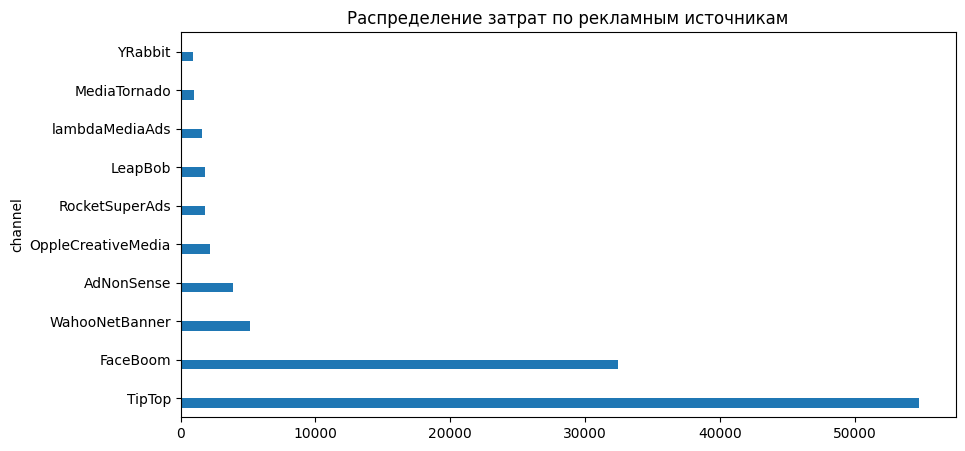

In [ ]:
ad_costs_channel.plot(kind='barh', legend=False, title='Распределение затрат по рекламным источникам', figsize=(10,5))
plt.show()


**Выводы:**  
- около половины всех маркетинговых затрат направлено на рекламный источник `TipTop`,
- около 30% затрат направлено на рекламный источник `FaceBoom`,
- на долю каждого из оставшисхя рекламных источников приходится менее чем по 5%.

<a id="динамика"></a>
### Построим визуализацию динамики изменения расходов во времени по каждому источнику.


In [ ]:
# Добавим в датафрейм "ad_costs" колонки с месяцем и неделей и построим сводные таблицы, по которым сделаем нужные графики.

ad_costs['month'] = ad_costs['dt'].dt.month
ad_costs['week'] = ad_costs['dt'].dt.isocalendar().week

channel_pivot_month = ad_costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
channel_pivot_month.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2


In [ ]:
channel_pivot_week = ad_costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
channel_pivot_week.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.2,81.6
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.9,103.2
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.3,90.4
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.4,119.2
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.8,83.2


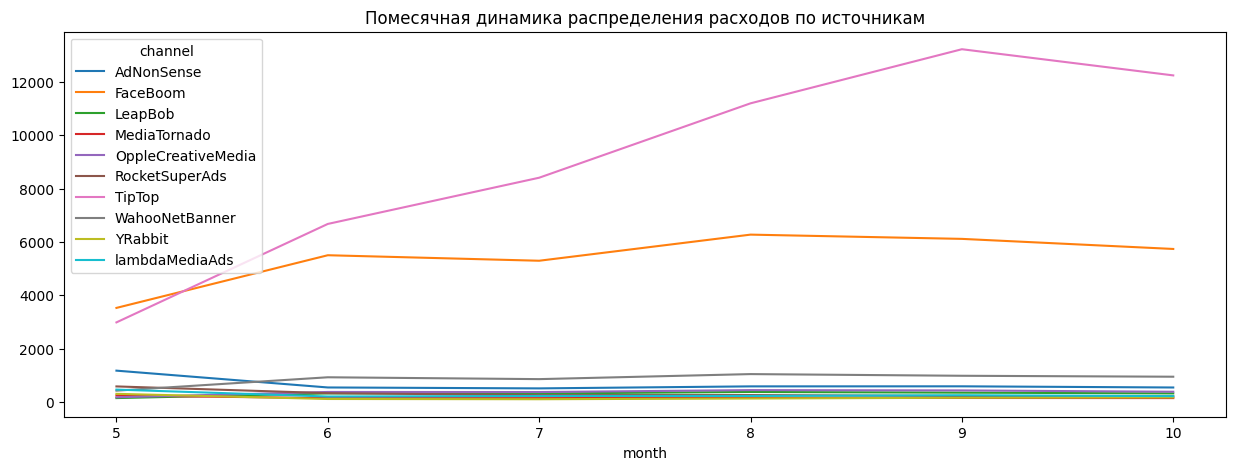

In [ ]:
channel_pivot_month.plot(title='Помесячная динамика распределения расходов по источникам', figsize=(15,5))
plt.show()

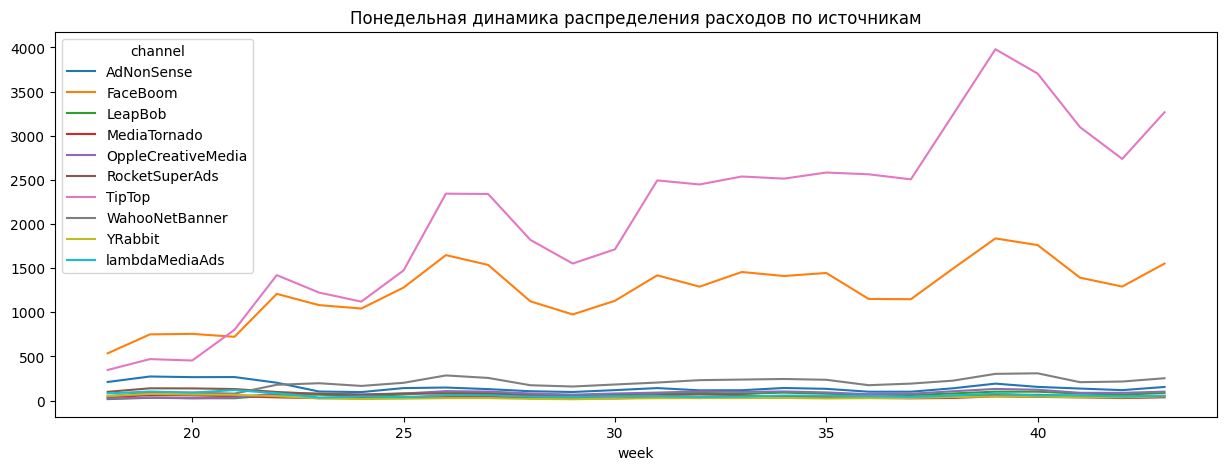

In [ ]:
channel_pivot_week.plot(title='Понедельная динамика распределения расходов по источникам', figsize=(15,5))
plt.show()

**Выводы:**  
- увеличение расходов на источник `TipTop` имеет ярко выраженный характер,
- расходы на источник `FaceBoom` увеличивались более плавно,
- расходы на прочие источники не имеют заметных изменений.

<a id="привлечение"></a>
### Выясним, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [ ]:
cac_channel = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False)
cac_channel

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


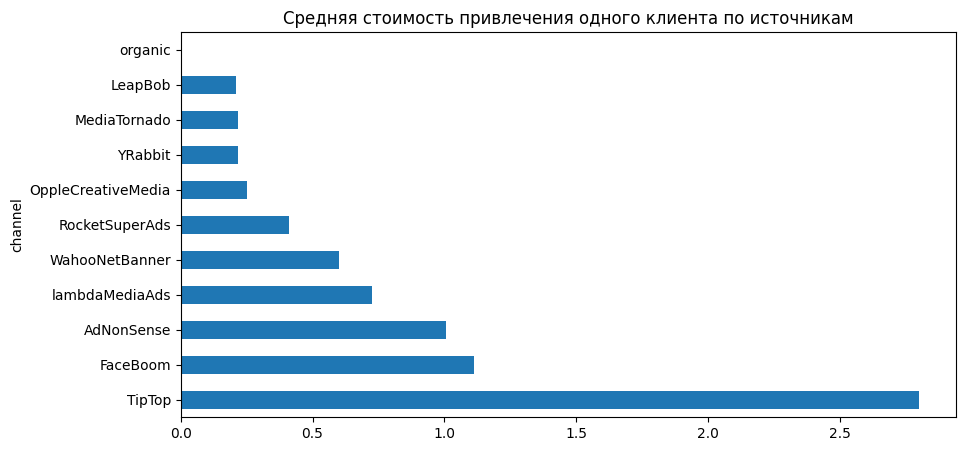

In [ ]:
cac_channel.plot(kind='barh', legend=False, title='Средняя стоимость привлечения одного клиента по источникам', figsize=(10,5))
plt.show()

**Выводы:**  
- самые высокие затраты на привлечение пользователей - через канал `TipTop` - в среднем 2,8 у.е. за пользователя.
- затраты на привлечениеу следующего по величине источника `FaceBoom` почти в четыре раза меньше - 1,1 у.е.

<a id="окупаемость"></a>
## Оценим окупаемость рекламы   
<a id="график"></a>
### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI



In [ ]:
#установим дату и горизонт исследования

observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [ ]:
# Исключим из дальнейшего анализа пользователей с органическим трафиком, поскольку мы за них ничего не платим, а нам нужно изучить именно окупаемость рекламы..

profiles = profiles.query('channel != "organic"')

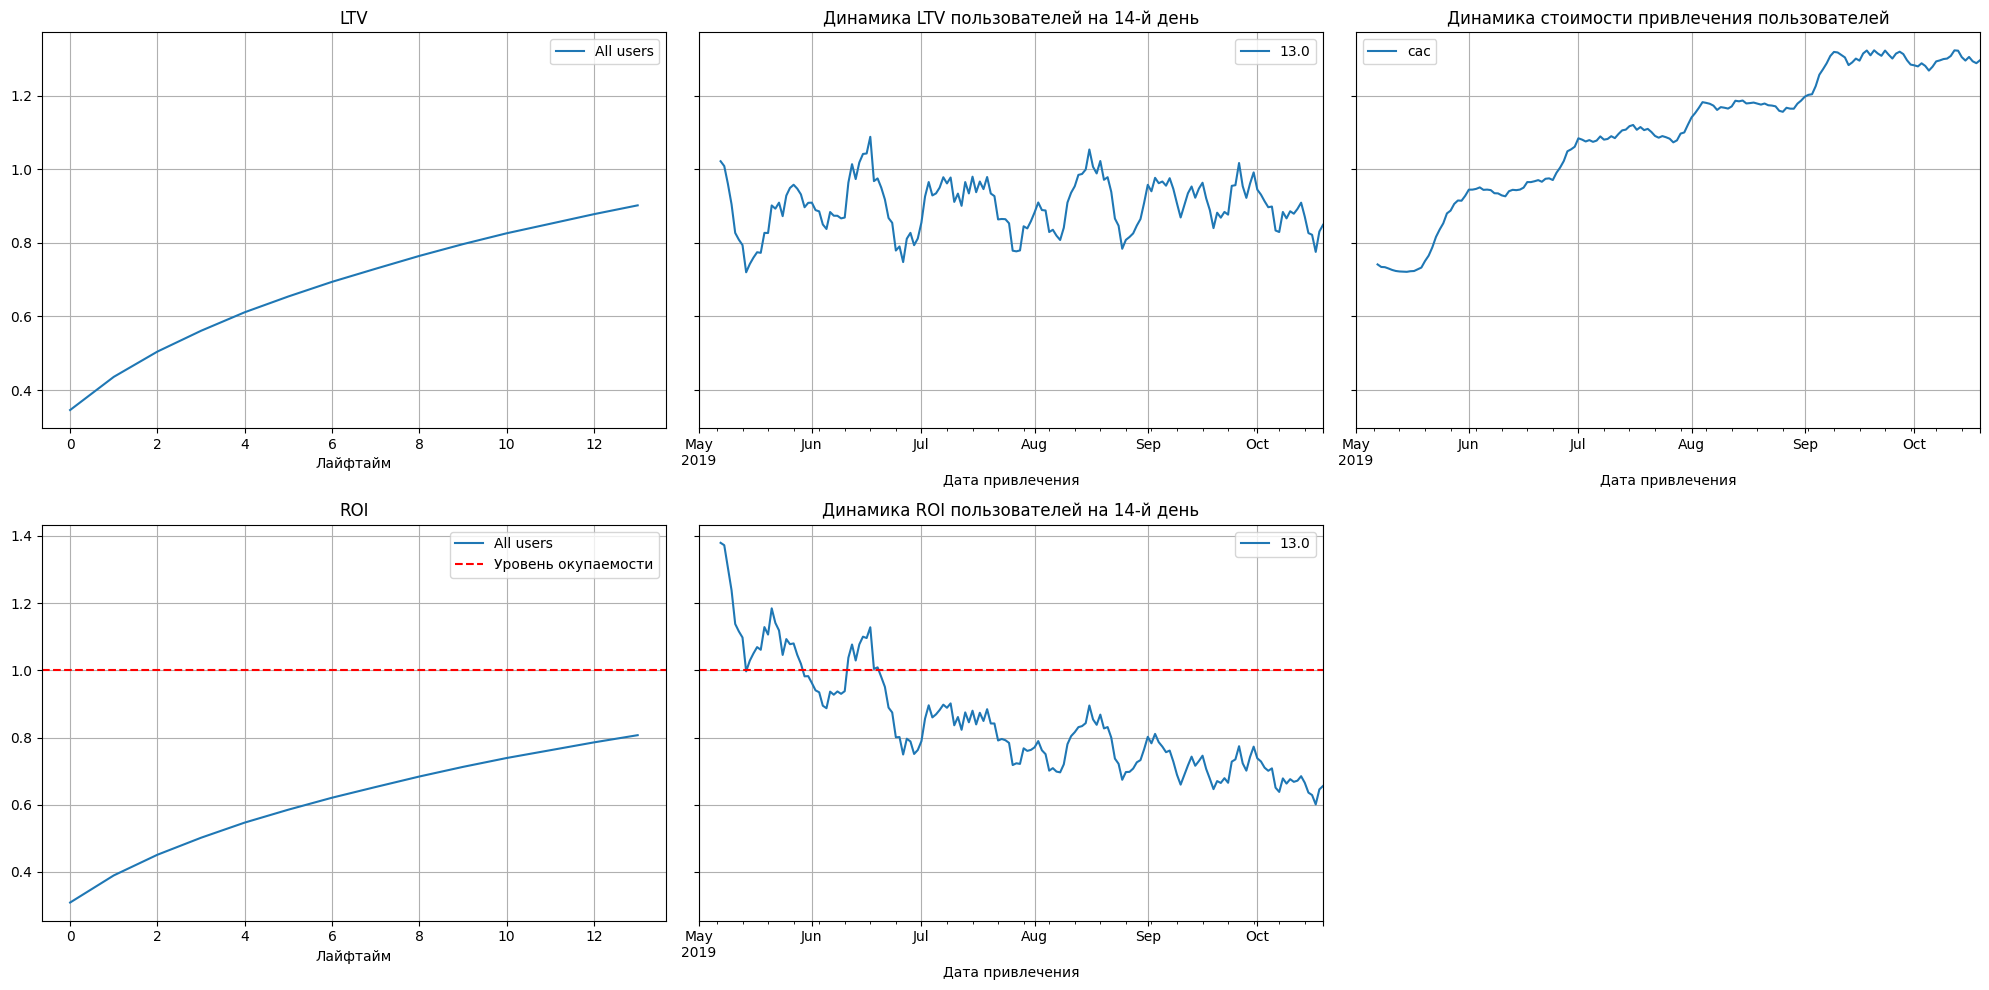

In [ ]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, purchases, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Выводы:**  
- за рассматриваемый период реклама не окупилась,
- стоимость привлечения новых пользователей заметно выросла и в последние два месяца стабилизировался своем максимальном уровне,
- изменение показателя LTV пользователей на 14-й день имеет циклический характер и в последние 4-5 месяцев он варьируется в коридоре от 0,8 до 1,0.
- показатель ROI пользователей на 14-й день:
    - резко снижался и к середине мая уменьшился до уровня окупаемости,
    - с середины июня стабильно находится ниже уровня окупаемости и имеет тенденцию к дальнейшему снижению,


<a id="конверсия"></a>
### Проверим конверсию пользователей и динамику её изменения.

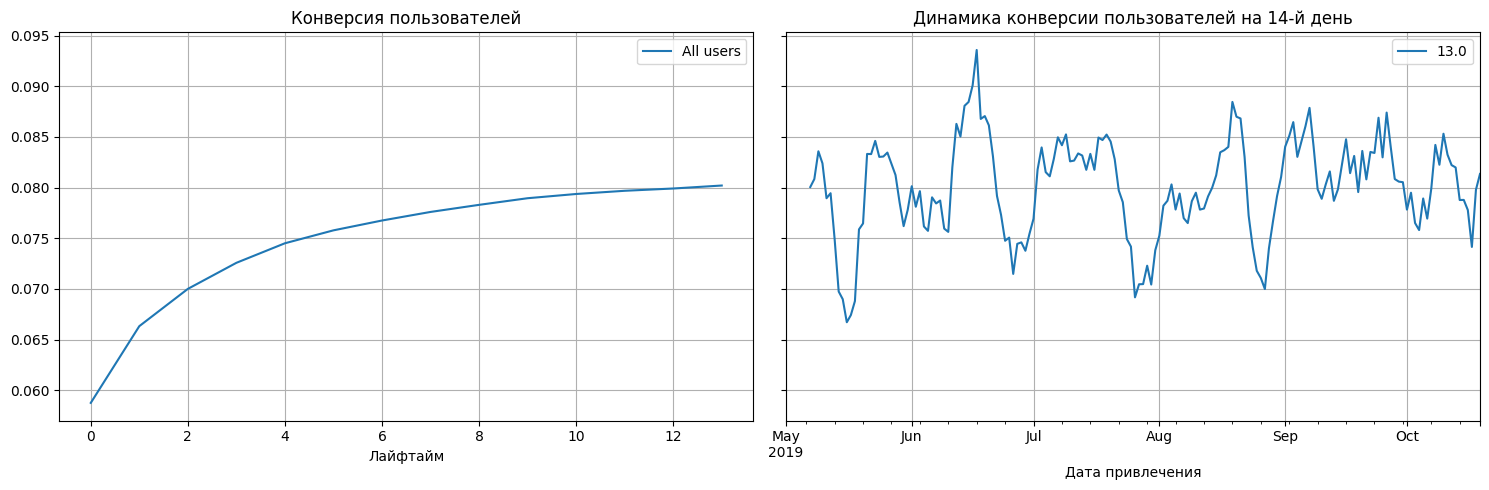

In [ ]:
# построим график конверсии

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, purchases, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы:**  
- динамика конверсии пользователей на 14-й день в первой половине рассматриваемого периода имела плавный восходящий характер, затем тренд сменился на нейтральный,
- лучший результат конверсии был в середине июня, когда этот показатель составил чуть менее 7%.

<a id="удержание"></a>
### Проверим удержание пользователей и динамику его изменения.

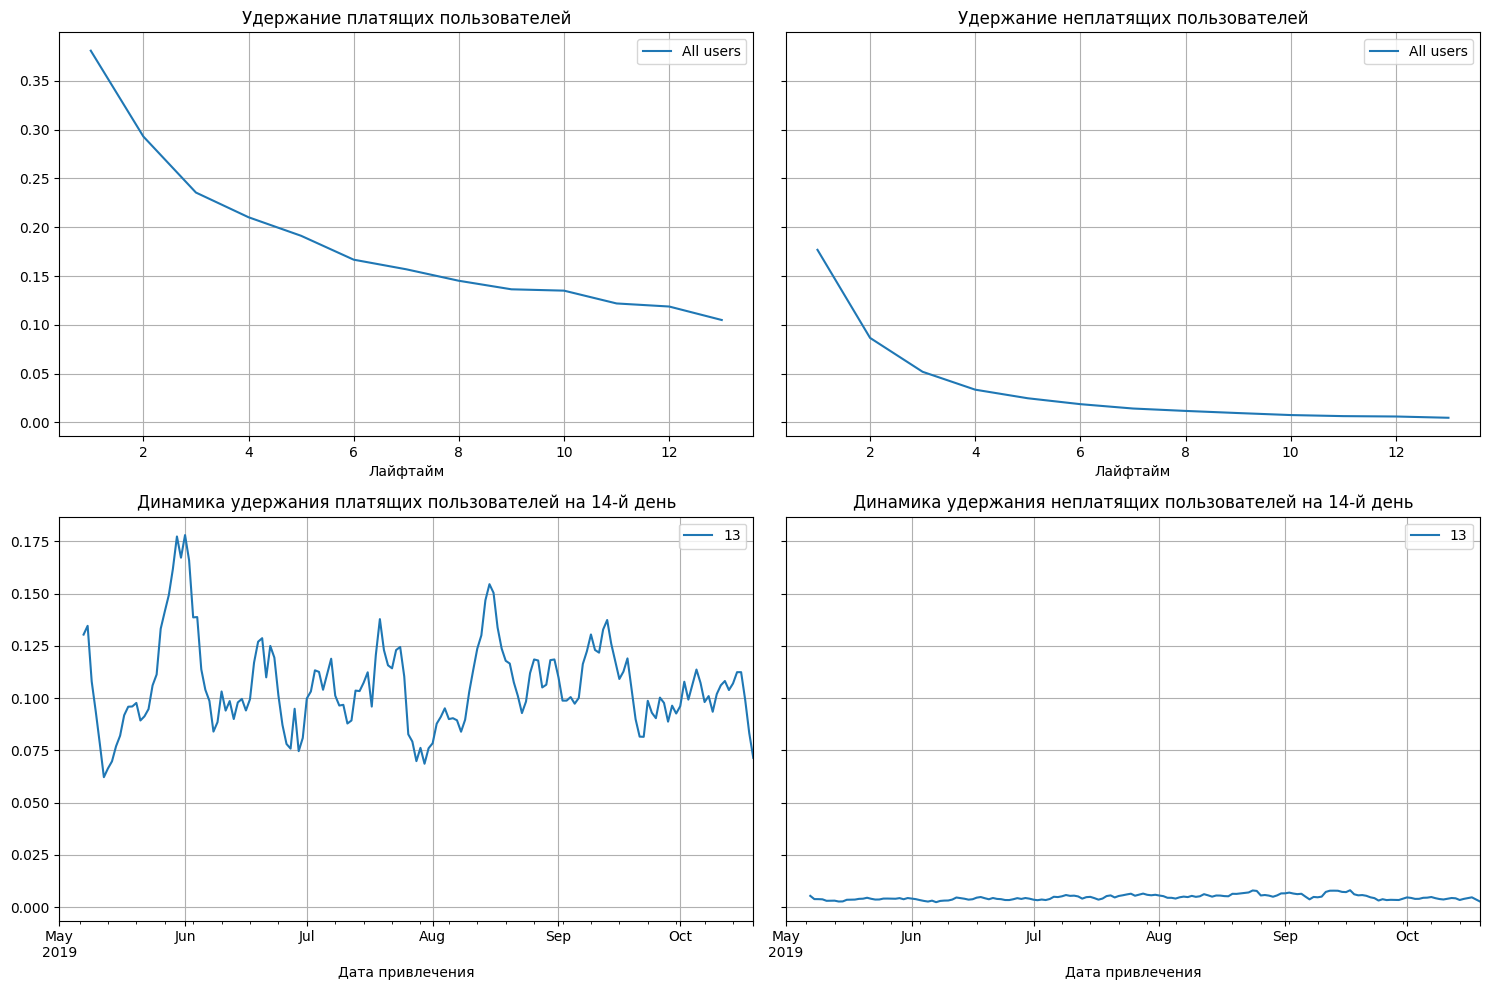

In [ ]:
# построим график удержания

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы:**  
- удержание платящих пользователей на 14-й день заметно меняется от месяца к месяцу и имеет тенденцию к уменьшению,
- видно, что конверсия на 14 день выходит на плато,
- удержание неплатящих пользователей имеет околонулевые значения.

<a id="по_устройствам"></a>
### Проанализируем окупаемость рекламы с разбивкой по устройствам.

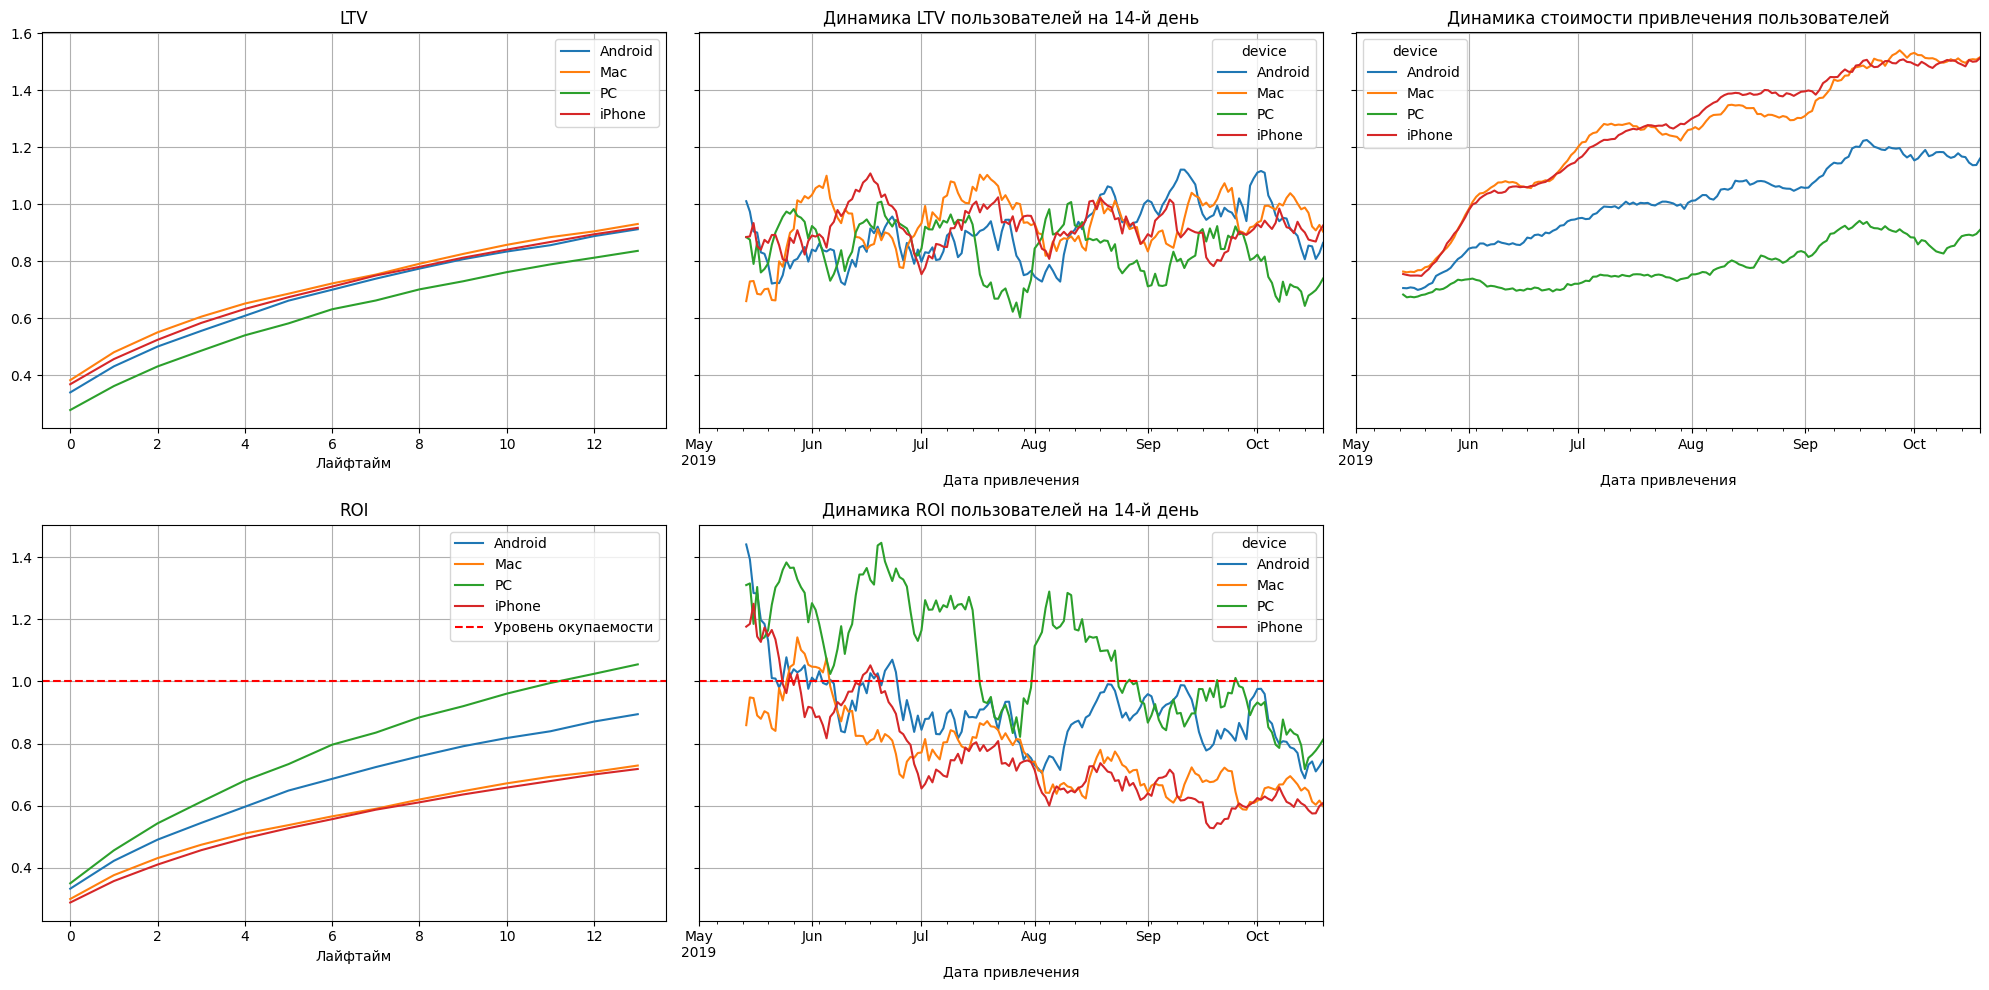

In [ ]:
# посмотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, purchases, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

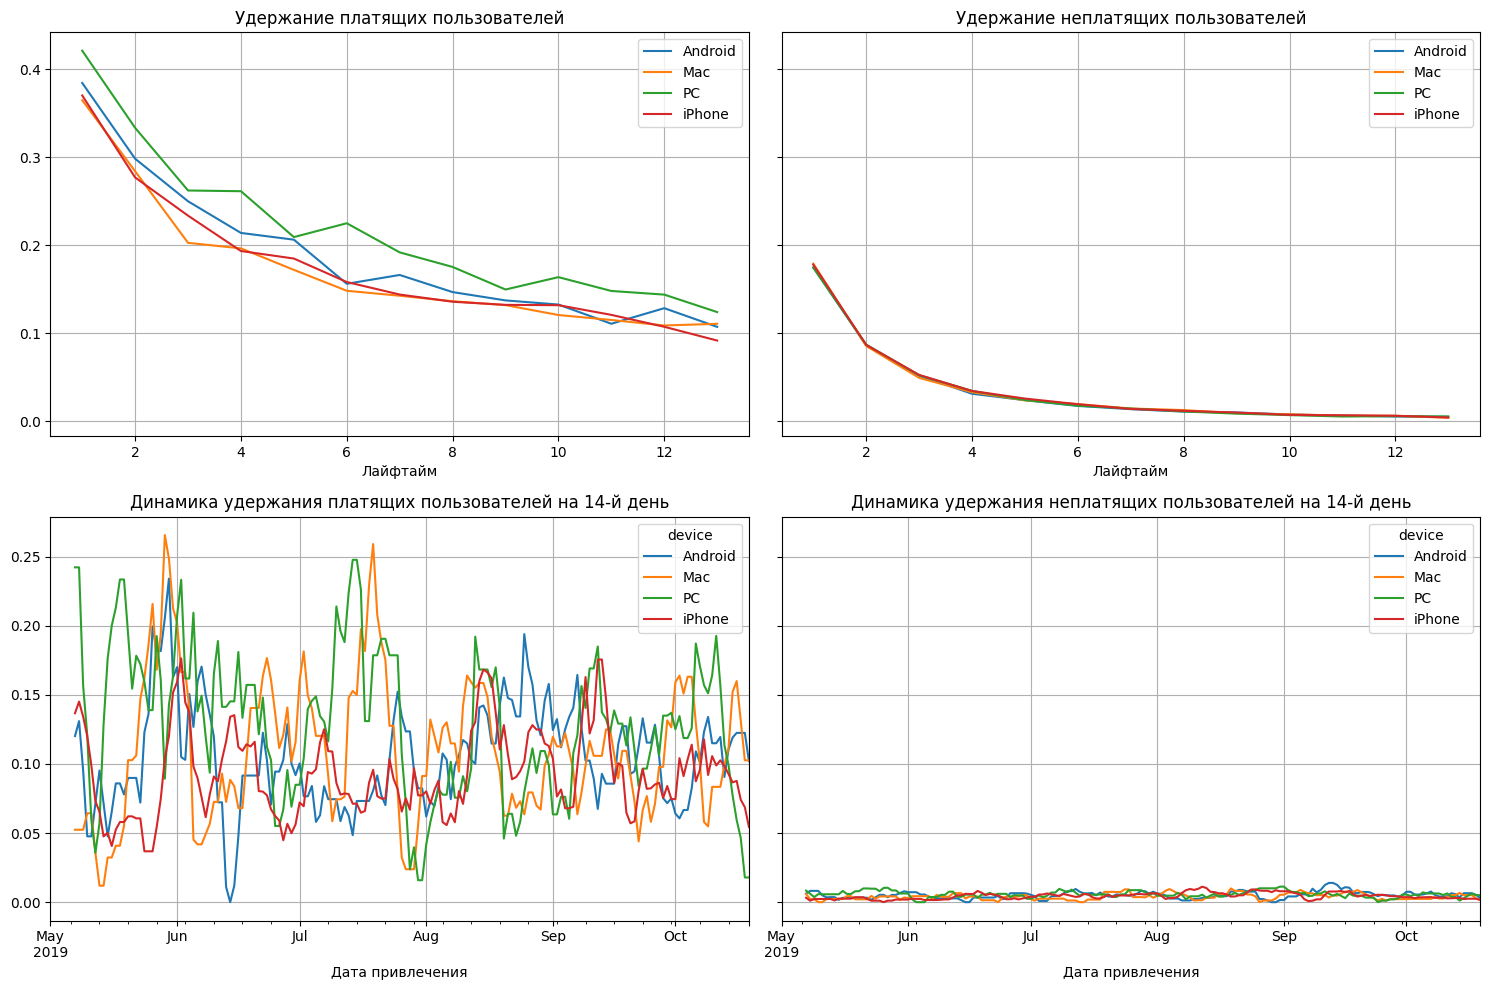

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы:**  
- к 14-му дню окупилась реклама для привлечения пользователей PC, затраты на привлечение пользователей Android, iPhone и Mac ниже уровня окупаемости,
- нет явной зависимости динамики LTV пользователей на 14-й день от типа используемого устройства,
- стоимость привлечения пользователей iPhone и Mac увеличивается большими темпами, чем пользователей PC и Android,
- на фоне общего увеличения `CAC` эта метрика для устройств `iPhone` и `Mac` увеличивается более интенсивно, что не позволяет выйти им на уровень окупаемости. Т.е. можно отметить, что мы не можем выделить какие-то резкие изменения - вероятно, основная проблема с плохой окупаемостью рекламы не связана только с типом устройства, а с растущим `САС`.

<a id="по_странам"></a>
### Проанализируем окупаемость рекламы с разбивкой по странам.

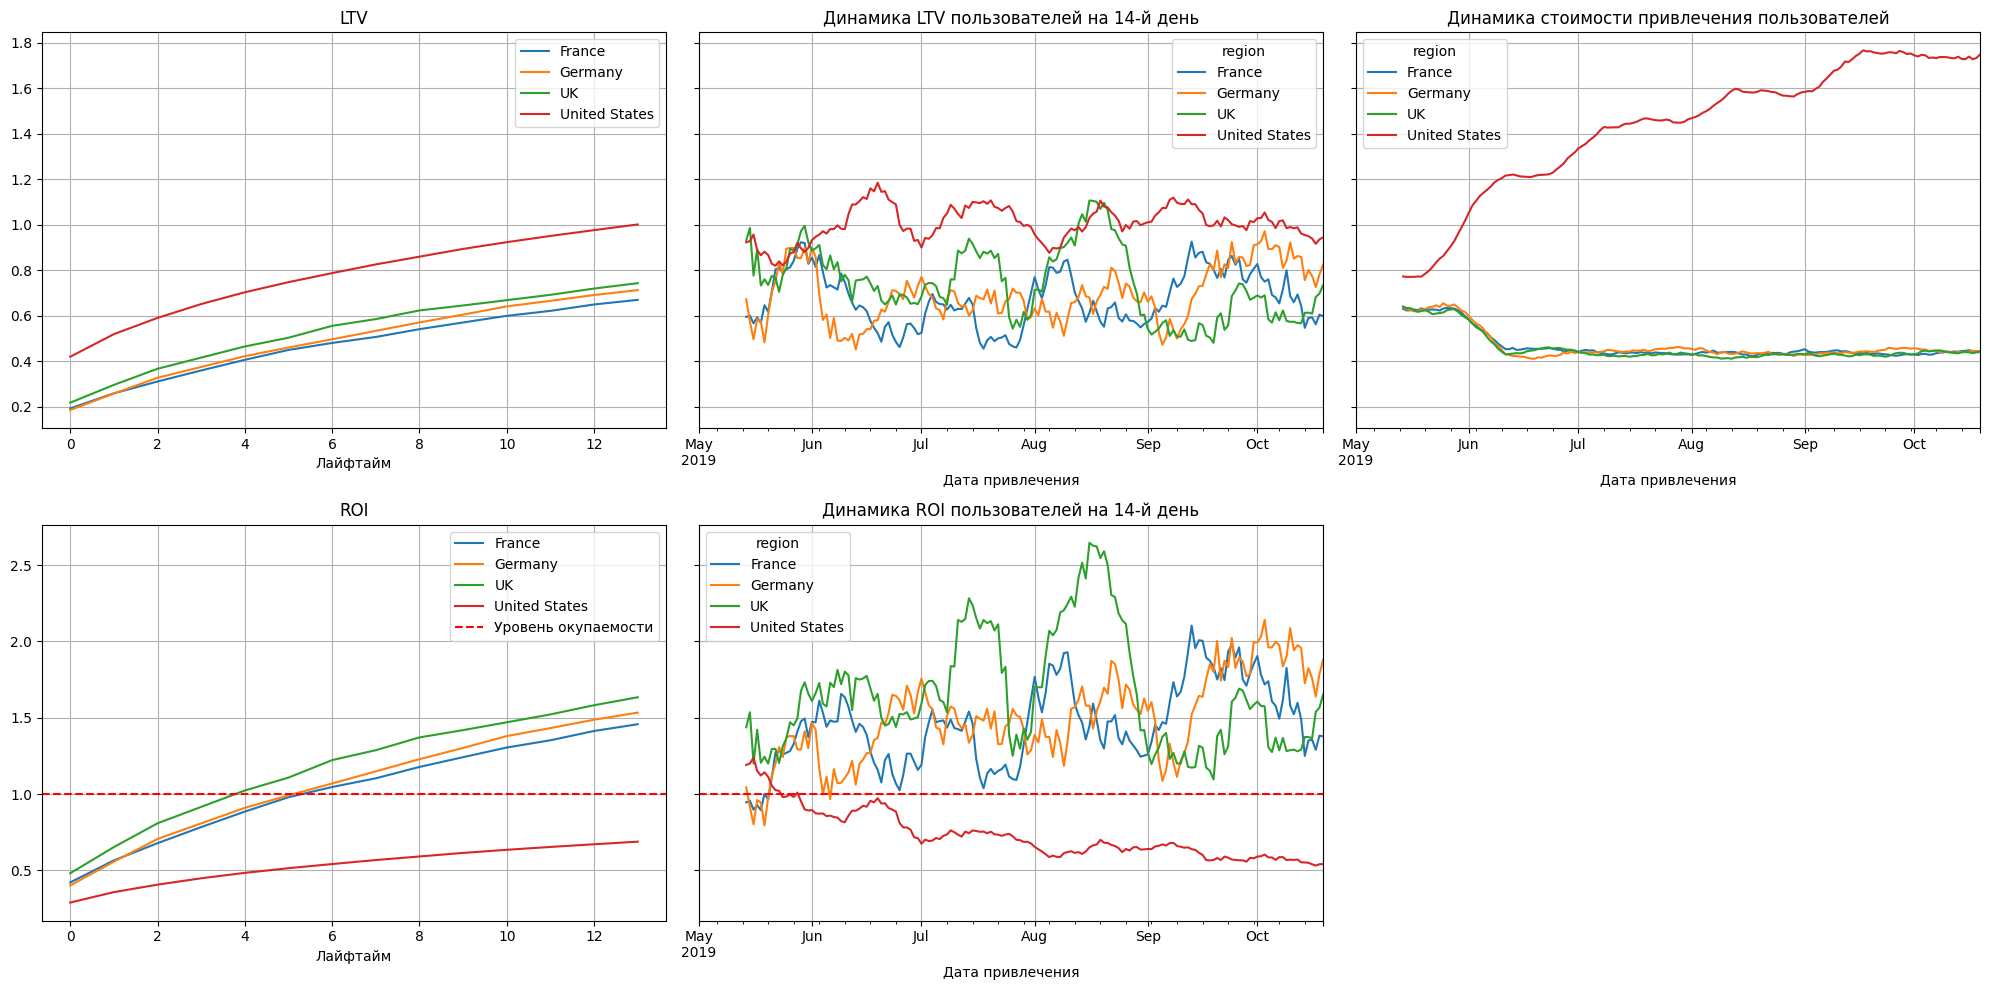

In [ ]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, purchases, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

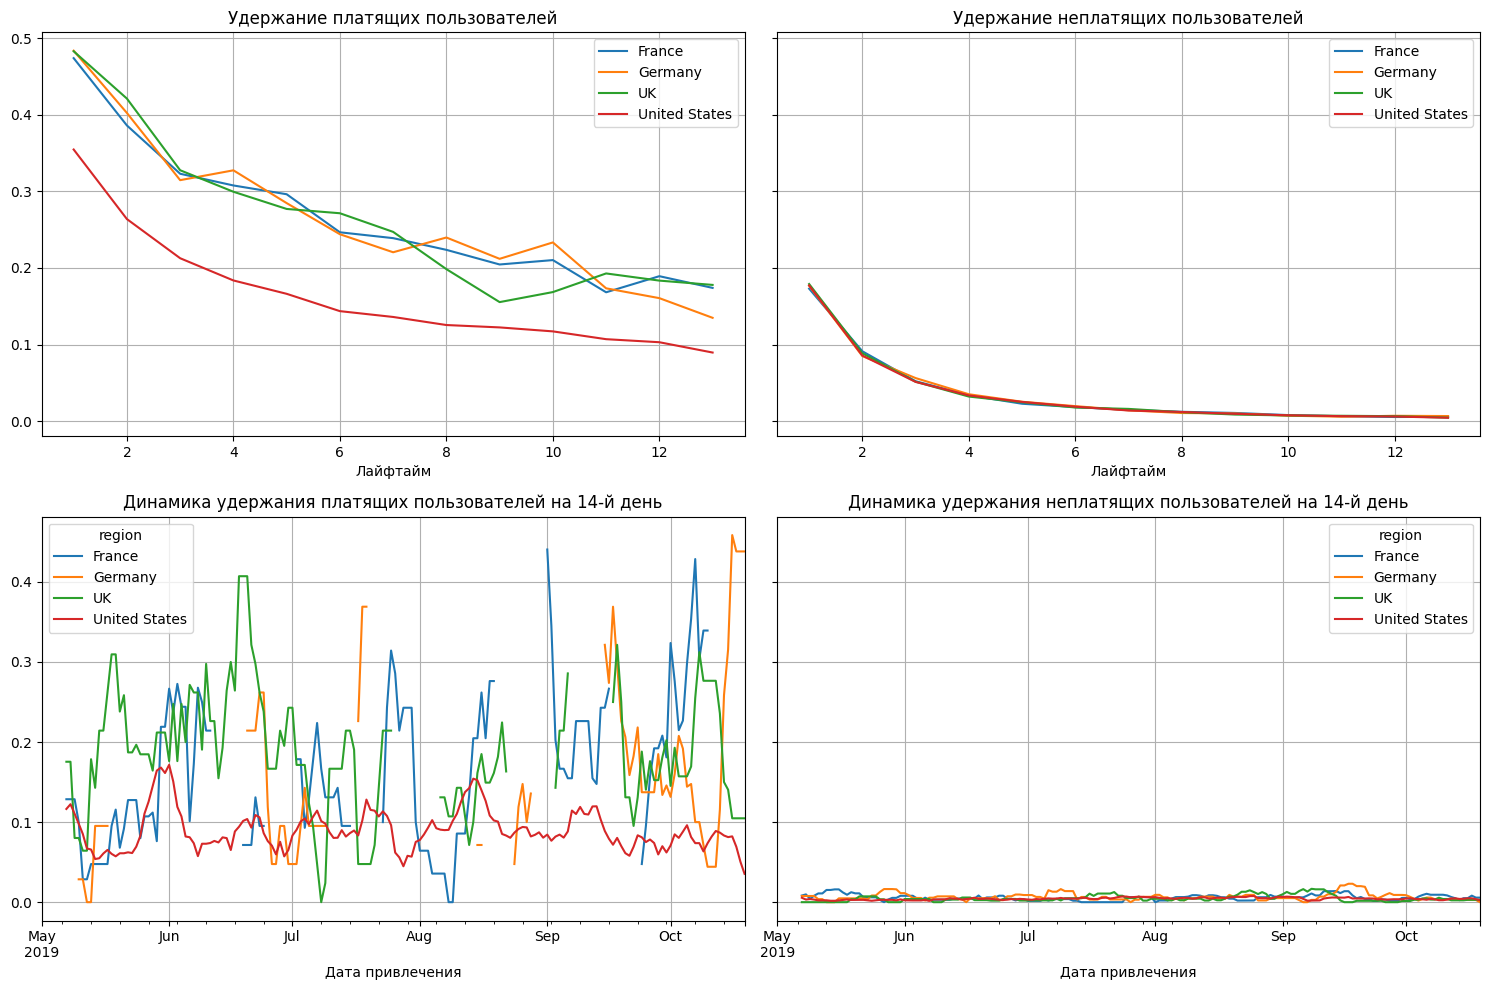

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы:**  
- окупились затраты на привлечение пользователей из всех стран, кроме США,
- LTV пользователей из США, как правило, выше LTV пользователей из других стран,
- стоимость привлечения (CAC) пользователей из США существенно больше привлечения пользователей из остальных стран и этот показатель имеет тенденцию к дальнейшему увеличению,
- вследствие существенного роста CAC и практически неизменного LTV, ROI пользователей из США на протяжении почти всего анализируемого периода находится ниже уровня окупаемости и продолжает снижаться.
- ROI пользователей из остальных стран стабильно выше уровня окупаемости,
- динамика удержания пользователей из США демонстрирует худшие результаты по сравнению с другими странами.

<a id="по_каналам"></a>
### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

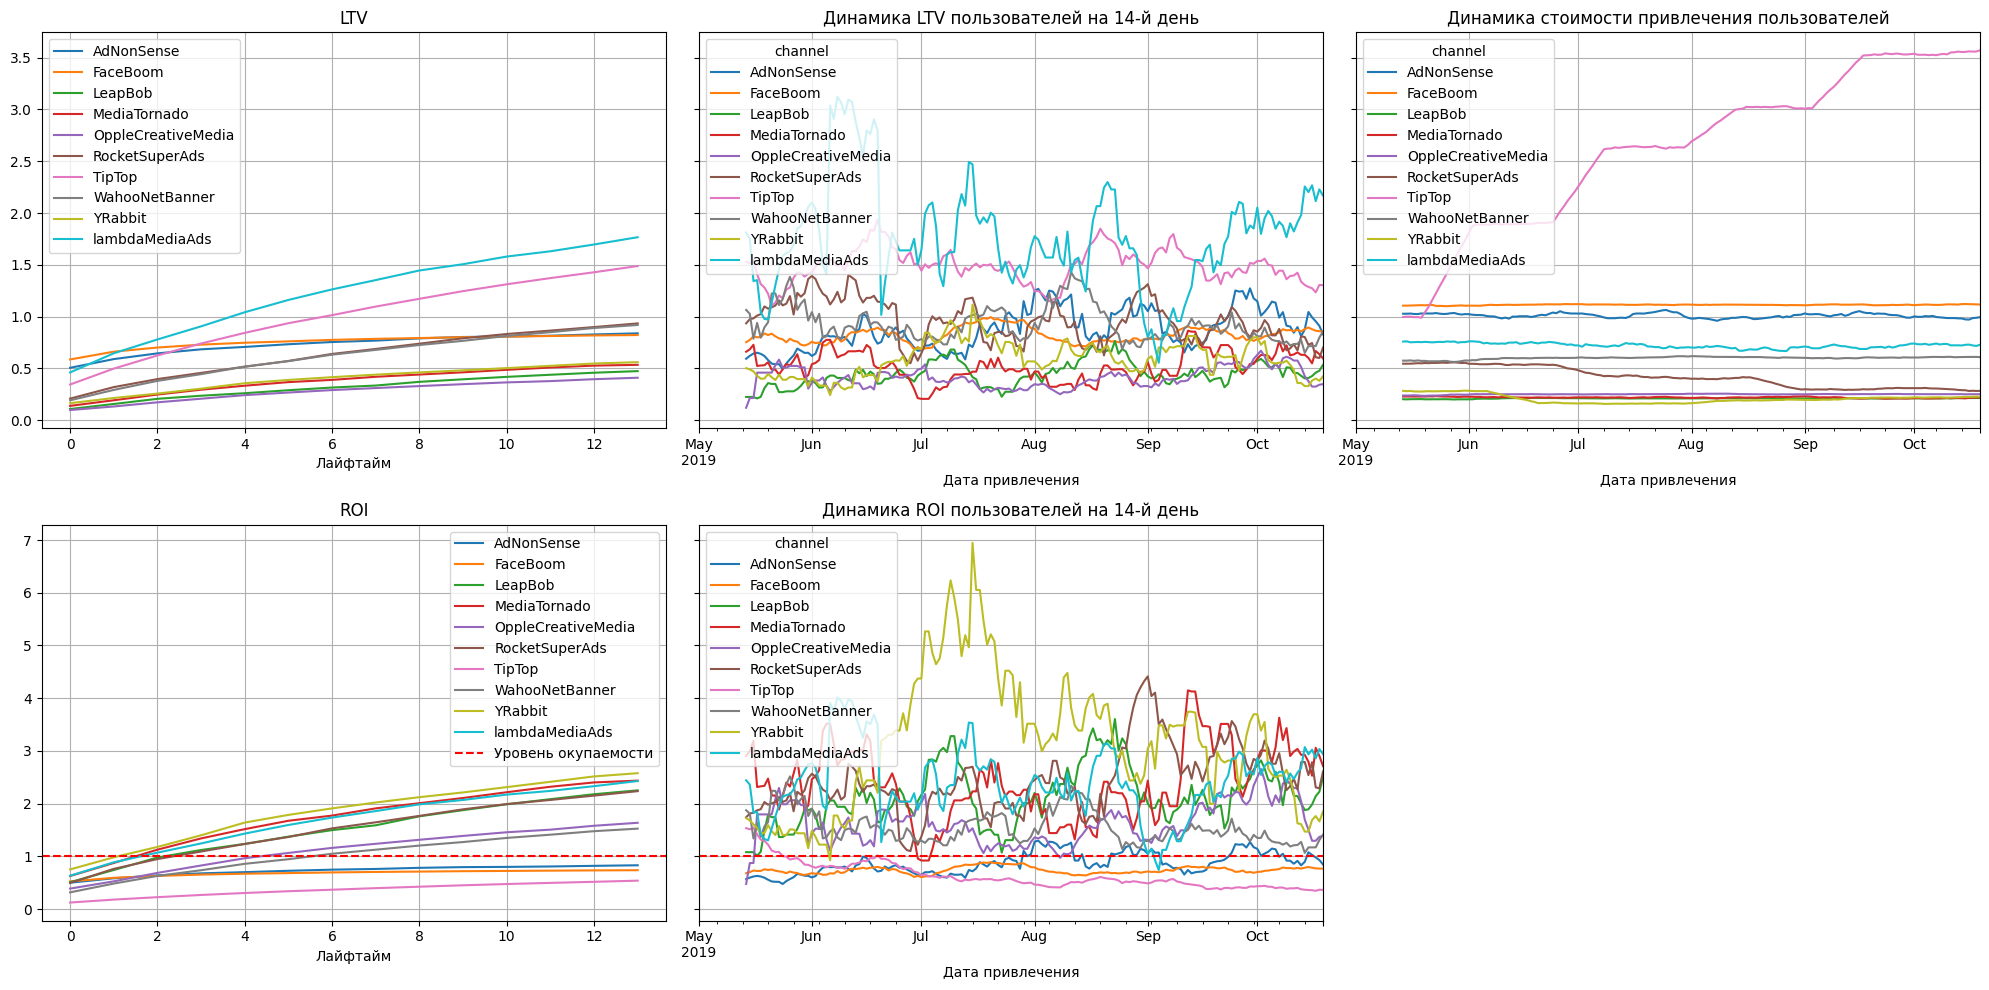

In [ ]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, purchases, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

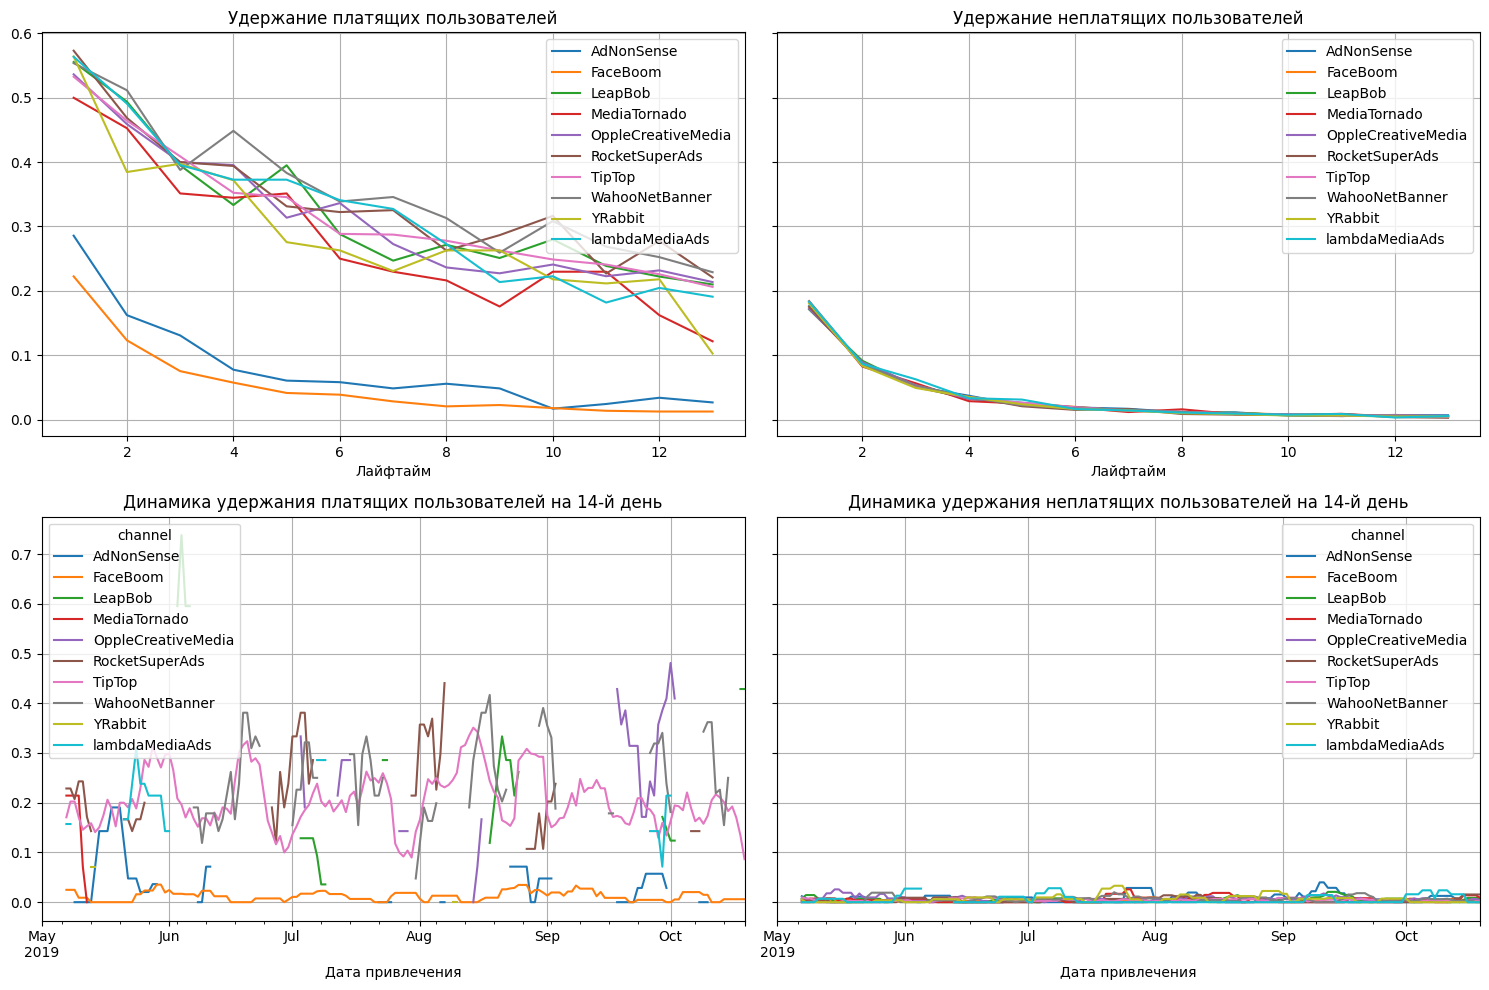

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Построим сводную таблицу и посмотрим в каких странах какие рекламные каналы работают.

In [ ]:
channels_pivot = profiles.pivot_table(index='region', columns='channel', values='user_id', aggfunc='count')
channels_pivot

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
region,,,,,,,,,,
France,1366.0,NaN,2988.0,NaN,2991.0,NaN,NaN,2971.0,NaN,742.0
Germany,1219.0,NaN,2519.0,NaN,2562.0,NaN,NaN,2579.0,NaN,649.0
UK,1295.0,NaN,3046.0,NaN,3052.0,NaN,NaN,3003.0,NaN,758.0
United States,NaN,29144.0,NaN,4364.0,NaN,4448.0,19561.0,NaN,4312.0,NaN


**Выводы:**  
- к 14-му дню не окупились затраты на привлечение пользователей через каналы `TipTop`, `FaceBoom`, `AdNonSense`,
- эти же каналы, демонстрируют худшую динамику ROI в течение года,
- лучшие результаты по ROI демонстрирует канал `YRabbit`,
- лучше остальных по динамике LTV выглядят каналы `lambdaMediaAds` и `TipTop`,
- у канала `TipTop` наблюдается существенное увеличение затрат на привлечение пользователей, в то время как у остальных каналов этот показатель стабилен,
- каналы `FaceBoom` и `AdNonSense` демонстрируют худшую динамику удержания клиентов.
- для привлечения американских пользователей работают 5 рекламных каналов и крупнейшие из них `FaceBoom` и `TipTop`.

**Резюме подраздела.**  

1. Реклама, направленная на привлечение пользователей в целом, не окупается. В начале анализируемого периода показатель ROI резко снижался. С середины июля он стабильно находится ниже уровня окупаемости и имеет тенденцию к дальнейшему снижению.  
  
2. Наш анализ показал, что на окупаемость рекламы оказывают негативное влияние:
    - рост CAC пользователей устройств Apple,  пользователей из США и через рекламный канал `TipTop`,
    - низкий уровень удержания пользователей, привлеченных через каналы `FaceBoom` и `AdNonSense`.


<a id="выводы"></a>
## Выводы и рекомендации

1. Мы прочитали и провели предварительную обработку исходных данных:
    - поменяли формат данных с датой на `datetime`,
    - поменяли стиль заголовков,
    - проверили отсуствие дубликатов и аномалий.
2. Добавили 8 вспомогательных функций для упрощения расчета и визуализации бизнес-показателей.
3. Составили датафрейм с профилями пользователей.
4. Определили временной диапазон анализа - с 01.05.2019 по 27.10.2019.
5. Наибольшее количество пользователей (как общее, так и только платящих) - из США.
6. Лучшим для нас пользователями являются владельцы устройств Apple:
    - наибольшее количество пользователей (как общее, так и только платящих) - владельцы iPhone,
    - наибольшая доля платящих пользователей - среди владельцев Mac.
7. Общая сумма расходов на маркетинг составила 105 497 у.е.
8. Лучшие рекламные каналы по доле платящих пользователей - `FaceBoom`, `AdNonSense`, `lambdaMediaAds`.
9. Структура распределения расходов по рекламным каналам:
    - `TipTop` - 51,9%,
    - `FaceBoom` - 30,8%,
     - прочие - менее 5% на каждый рекламный канал.
10. Динамика роста расходов по рекламным каналам:
    - `TipTop` - явно растущий тренд,
    - `FaceBoom` умеренно растущий тренд,
    - прочие - нейтральная динамика.
11. Средние затраты на привлечение одного пользователя по источникам:
    - самые высокие: `TipTop` - 2,8 у.е., `FaceBoom` - 1,1 у.е.,
    - самые низкие: `LeapBob` - 0,21 у.е., `MediaTornado` - 0,22 у.е.
    
    
12. **Маркетинговые расходы** на привлечение новых пользователей **не окупаются** (ROI ниже уровня окупаемости).
13. LTV пользователей на 14-й день имеет циклический характер и нейтральный тренд.
14. Cтоимость привлечения пользователей (CAC) на 14-й день имеет восходящий тренд, т.е., затраты на привлечение пользователей растут.
15. Конверсия пользователей к концу рассматриваемого период имеет нейтральную динамику и консолидируется у отметки 6%.
16. Динамика удержания платящих пользователей имеет нисходящий тренд.

**Причины отсутствия окупаемости рекламы**:
- рост стоимости привлечения пользователей устройств Apple (Mac, iPhone),
- рост стоимости привлечения пользователей из США,
- высокая стоимость привлечения пользователей через рекламные каналы `TipTop` и `FaceBoom`,
- низкая степень удержания пользователей (retention rate), проилеченных через рекламные каналы `FaceBoom`, `TipTop` и `AdNonSense`.


**Рекомендации:**  

- Снижение retention rate пользователей из США обуславливает рост затрат на их привлечение. Это приводит к неокупаемости каналов, работающих на американском рынке. Прежде всего, крупнейших из них -`FaceBoom` и `TipTop`. В то же время эти каналы привлекают качественных пользователей с высоким LTV.  
Рекомендуется проанализировать причины низкого удержания пользователей, привлеченных черех эти каналы и оптимизмровать расходы.
